In [1]:
# autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import os

if os.getcwd().split("/")[-1] != "Road-Segmentation-ML":
    os.chdir("..")
print("CWD:", os.getcwd())

CWD: /home/stef/Desktop/School/EPFL/CS-433 Machine Learning/ML_course/projects/Road-Segmentation-ML


In [3]:
import torch
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# import dataset classes
from datasets.BaseDataset import BaseDataset
from datasets.TransformDataset import TransformDataset

# import models wrappers
from models.UNetV1 import UNetV1
from models.UNetV2 import UNetV2
from models.UNetV3 import UNetV3
from models.DeepLabV3 import ResNet101

/home/stef/anaconda3/envs/road_segmentation/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# select checkpoint
MODEL = "models/checkpoints/unetv3-resnet50-normalization-BEST2.pt"
# load checkpoint
try:
    checkpoint = torch.load(MODEL)
except:
    print("Loading checkpoint failed. Trying to load it with map_location.")
    checkpoint = torch.load(MODEL, map_location=torch.device("cpu"))
# create model
model = UNetV3()
# load model weights
model.load_state_dict(checkpoint)

<All keys matched successfully>

In [5]:
# paths to image and ground truth folders
image_folder = ["datasets/train/images/"]  # , "massachusetts_416/images/"]
gt_folder = ["datasets/train/groundtruth/"]  # , "massachusetts_416/groundtruth/"]
# create base dataset
dataset = BaseDataset(image_folder, gt_folder)
# define image transform
mean = [0.3353, 0.3328, 0.2984]
std = [0.1967, 0.1896, 0.1897]
image_transform = transforms.Compose(
    [
        transforms.Resize((416, 416)),
        transforms.ToTensor(),
        transforms.Normalize(mean=mean, std=std),
    ]
)
# define gt tranform
gt_transform = transforms.Compose(
    [transforms.Resize((416, 416)), transforms.ToTensor()]
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 416, 416])
min: 0.0
max: 1.0


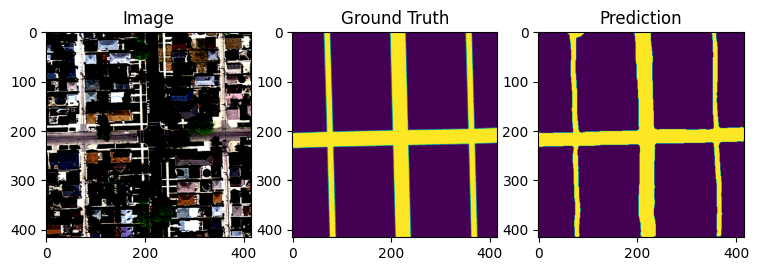

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 416, 416])
min: 0.0
max: 1.0


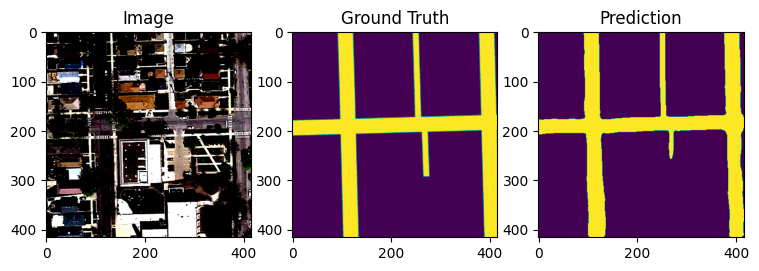

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 416, 416])
min: 0.0
max: 1.0


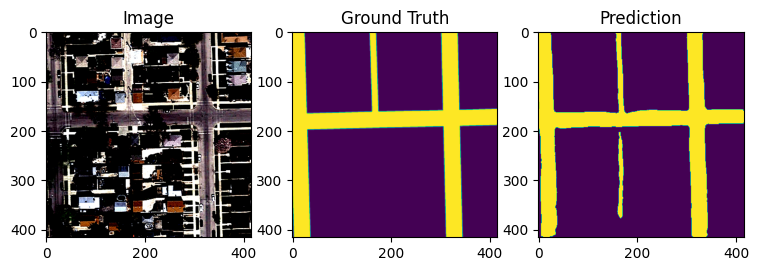

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 416, 416])
min: 0.0
max: 1.0


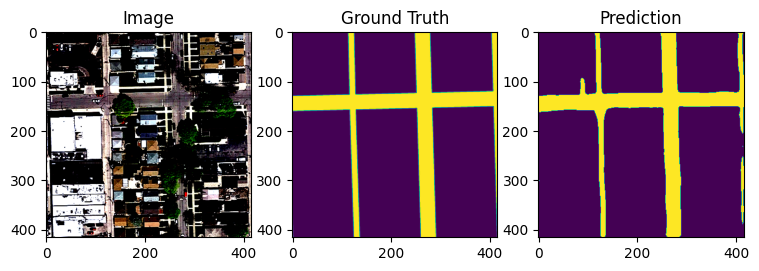

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 416, 416])
min: 0.0
max: 1.0


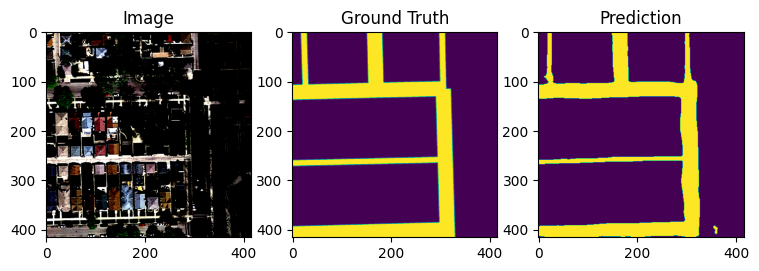

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 416, 416])
min: 0.0
max: 1.0


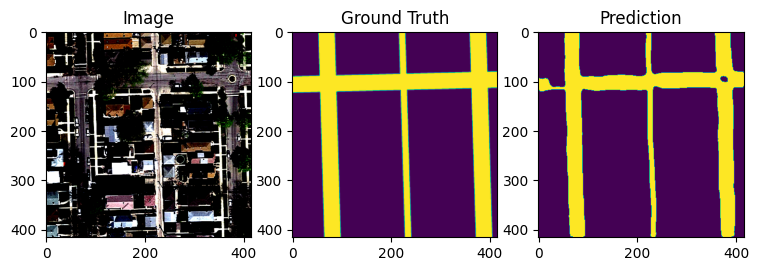

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 416, 416])
min: 0.0
max: 1.0


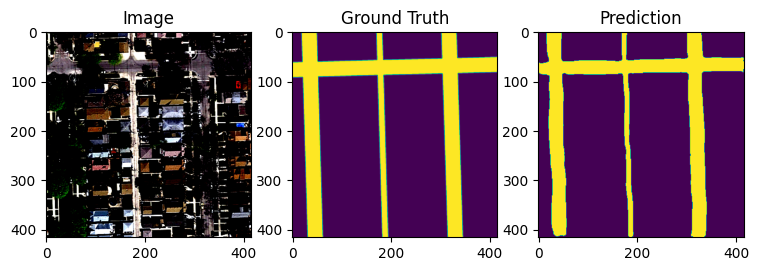

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 416, 416])
min: 0.0
max: 1.0


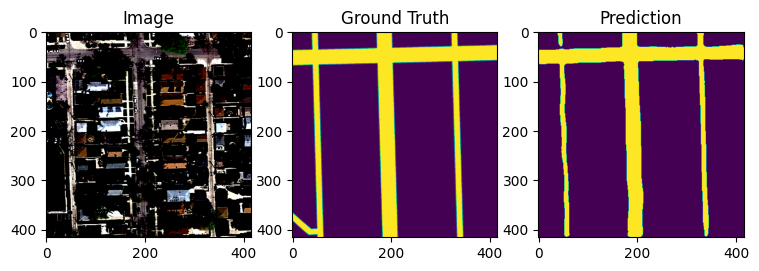

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 416, 416])
min: 0.0
max: 1.0


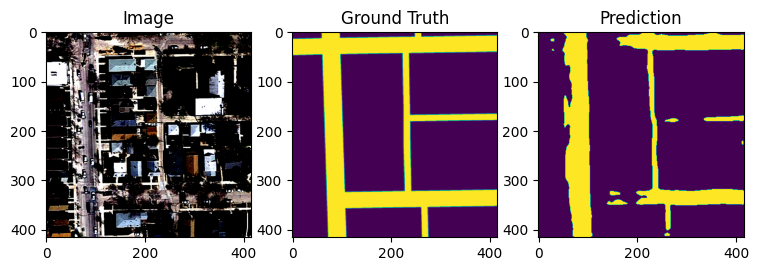

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 1, 416, 416])
min: 0.0
max: 1.0


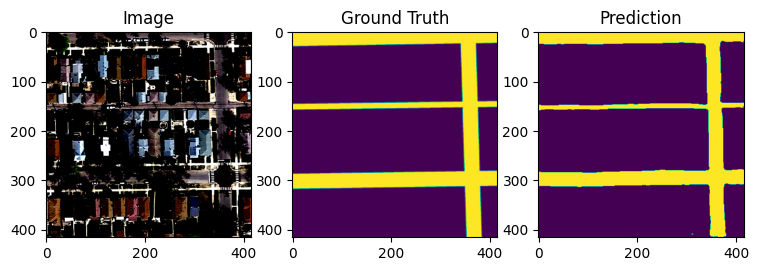

In [12]:
# define threshold
THR = 0.4
# visualize
for K in range(10):
    # get image and ground truth
    image = image_transform(dataset[K][0])
    gt = gt_transform(dataset[K][1])
    # predict
    prediction = model(image.unsqueeze(0))
    # apply sigmoid
    prediction = torch.sigmoid(prediction)
    prediction = (prediction > 0.6).float()
    print(prediction.shape)
    # convert to numpy array
    image = image.numpy().transpose(1, 2, 0)
    gt = gt.numpy().squeeze(0)
    prediction = prediction.detach().numpy().squeeze(0).squeeze(0)
    # print min and max value in prediction
    print("min:", np.min(prediction))
    print("max:", np.max(prediction))
    # threshold
    prediction[prediction <= THR] = 0
    prediction[prediction > THR] = 1
    # plot
    fig, ax = plt.subplots(1, 3, figsize=(9, 3))
    ax[0].imshow(image)
    ax[0].set_title("Image")
    ax[1].imshow(gt)
    ax[1].set_title("Ground Truth")
    ax[2].imshow(prediction)
    ax[2].set_title("Prediction")
    plt.show()